### Case Study on Vendor Selection using K-Means Clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('vendor_selection.csv')
df.head()

,num,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,avg_availability_components
0,1,0.13,0.63,1,1,1,1,4,1,1,1,1,1,0,1,1,1,1,0.9
1,2,0.08,0.63,1,1,1,1,4,1,1,1,0,1,1,1,1,1,1,0.9
2,3,0.50,0.90,1,0,1,1,3,1,0,1,0,1,1,1,1,1,1,0.8
3,4,0.63,1.00,1,1,1,1,4,0,1,1,1,1,1,1,1,1,1,0.9
4,5,0.28,0.75,0,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1.0


### EDA

In [6]:
df.describe()

,num,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,avg_availability_components
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,0.432308,0.521154,0.576923,0.692308,0.538462,0.500000,2.692308,0.653846,0.576923,0.576923,0.538462,0.653846,0.500000,0.692308,0.538462,0.615385,0.615385,0.596154
std,7.648529,0.296517,0.242558,0.503831,0.470679,0.508391,0.509902,1.010712,0.485165,0.503831,0.503831,0.508391,0.485165,0.509902,0.470679,0.508391,0.496139,0.496139,0.232346
min,1.000000,0.030000,0.130000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,7.250000,0.147500,0.357500,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425000
50%,13.500000,0.440000,0.500000,1.000000,1.000000,1.000000,0.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.600000
75%,19.750000,0.630000,0.720000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
max,26.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num                          26 non-null     int64  
 1   cost                         26 non-null     float64
 2   quality                      26 non-null     float64
 3   iso                          26 non-null     int64  
 4   delivery_charges             26 non-null     int64  
 5   existing_relationships       26 non-null     int64  
 6   warranties_claims            26 non-null     int64  
 7   professional_employees       26 non-null     int64  
 8   component_1                  26 non-null     int64  
 9   component_2                  26 non-null     int64  
 10  component_3                  26 non-null     int64  
 11  component_4                  26 non-null     int64  
 12  component_5                  26 non-null     int64  
 13  component_6           

In [8]:
df.shape

(26, 19)

In [9]:
df.columns

Index(['num', 'cost', 'quality', 'iso', 'delivery_charges',
       'existing_relationships', 'warranties_claims', 'professional_employees',
       'component_1', 'component_2', 'component_3', 'component_4',
       'component_5', 'component_6', 'component_7', 'component_8',
       'component_9', 'component_10', 'avg_availability_components'],
      dtype='object')

In [45]:
df.drop(["num"],inplace=True,axis=1)

In [46]:
drop = df[['component_1', 'component_2', 'component_3', 'component_4',
       'component_5', 'component_6', 'component_7', 'component_8',
       'component_9', 'component_10']]

In [47]:
df.drop(drop, inplace=True, axis=1)

In [48]:
df.shape

(26, 8)

In [49]:
df.head()

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components
0,0.13,0.63,1,1,1,1,4,0.9
1,0.08,0.63,1,1,1,1,4,0.9
2,0.50,0.90,1,0,1,1,3,0.8
3,0.63,1.00,1,1,1,1,4,0.9
4,0.28,0.75,0,1,1,1,4,1.0


### Finding the optimal value of k

In [16]:
from sklearn.cluster import KMeans

In [17]:
df.columns

Index(['cost', 'quality', 'iso', 'delivery_charges', 'existing_relationships',
       'warranties_claims', 'professional_employees',
       'avg_availability_components'],
      dtype='object')

In [18]:
x = df[['cost', 'quality', 'iso', 'delivery_charges', 'existing_relationships',
       'warranties_claims', 'professional_employees',
       'avg_availability_components']]

In [21]:
inertias = []
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    
    inertias.append(kmeanModel.inertia_)

In [22]:
inertias

[55.403157692307694,
 30.640162500000002,
 24.848375,
 20.45169642857143,
 17.522308333333328,
 15.806962500000004,
 13.487610000000002,
 11.585149999999997,
 10.066691666666667]

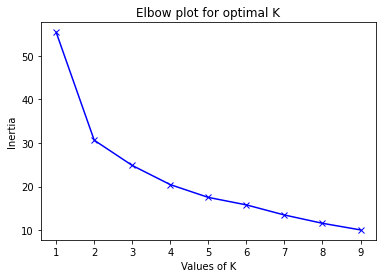

In [23]:
#Plotting inertia for various values of x

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow plot for optimal K')
plt.show()

**According to the above elbow plot, the optimum number of clusters for this dataset is 2 (as inertia is seen to gradually decrease after the point where k=2).**

### Building the model

In [122]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [123]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1])

In [124]:
labels = pd.DataFrame(kmeans.labels_)

In [125]:
df_label = pd.concat([df,labels],axis=1)
df_label

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,0
0,0.13,0.63,1,1,1,1,4,0.9,0
1,0.08,0.63,1,1,1,1,4,0.9,0
2,0.50,0.90,1,0,1,1,3,0.8,0
3,0.63,1.00,1,1,1,1,4,0.9,0
4,0.28,0.75,0,1,1,1,4,1.0,0
5,0.03,0.35,1,0,1,0,3,0.3,0
6,0.30,0.55,1,1,1,1,4,0.9,0
7,0.50,0.63,1,1,0,1,3,0.5,0
8,0.60,0.75,1,0,0,1,3,0.6,0
9,0.38,0.50,1,1,1,1,3,0.8,0


In [126]:
colors = np.array(['red', 'blue'])

Text(0, 0.5, 'Quality')

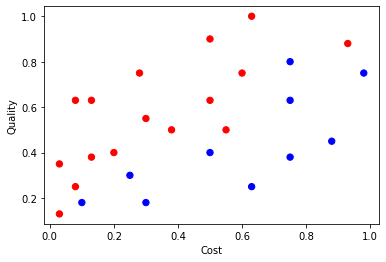

In [127]:
#Scatter plot for cost vs quality

plt.scatter(df['cost'], df['quality'], c=colors[kmeans.labels_], s=40)
plt.xlabel('Cost')
plt.ylabel('Quality')

In [128]:
df0 = df_label[df_label.iloc[:,8] == 0]
df0

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,0
0,0.13,0.63,1,1,1,1,4,0.9,0
1,0.08,0.63,1,1,1,1,4,0.9,0
2,0.50,0.90,1,0,1,1,3,0.8,0
3,0.63,1.00,1,1,1,1,4,0.9,0
4,0.28,0.75,0,1,1,1,4,1.0,0
5,0.03,0.35,1,0,1,0,3,0.3,0
6,0.30,0.55,1,1,1,1,4,0.9,0
7,0.50,0.63,1,1,0,1,3,0.5,0
8,0.60,0.75,1,0,0,1,3,0.6,0
9,0.38,0.50,1,1,1,1,3,0.8,0


In [129]:
df1 = df_label[df_label.iloc[:,8] == 1]
df1

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,0
15,0.75,0.63,1,1,0,0,2,0.6,1
16,0.98,0.75,0,1,0,1,2,0.6,1
18,0.75,0.80,0,1,1,0,2,0.6,1
19,0.10,0.18,0,1,0,0,2,0.5,1
20,0.25,0.30,0,0,0,0,2,0.4,1
21,0.50,0.40,0,1,1,0,2,0.5,1
22,0.30,0.18,1,1,0,0,1,0.4,1
23,0.75,0.38,0,1,0,0,1,0.5,1
24,0.63,0.25,0,0,1,1,1,0.6,1
25,0.88,0.45,0,0,0,0,1,0.3,1


### Feature Scaling

In [131]:
from sklearn.decomposition import PCA
pca = PCA(2)
df_pca = pca.fit_transform(df)

In [132]:
df_pca.shape

(26, 2)

In [133]:
lab = kmeans.fit_predict(df_pca)
lab

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1])

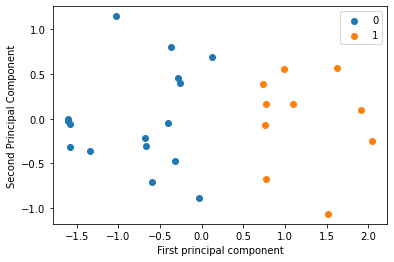

In [134]:
#plotting the results:
 
for i in range(0,2):
    plt.scatter(df_pca[lab == i , 0] , df_pca[lab == i , 1] , label = i)
plt.legend()
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

**Conclusion: According to the graphs above, the points falling under cluster 0 seem to have lower costs and higher quality. Therefore, by looking at these 2 principal components, it can be concluded that the vendors falling under cluster 0 are more profitable for the manufacturing company.**